In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon

# Set the default for plots
%matplotlib inline

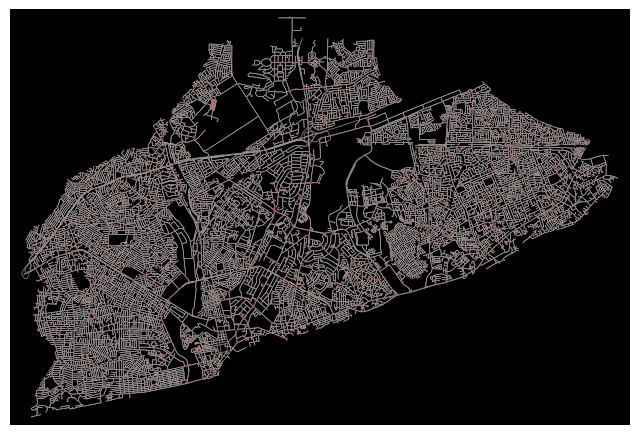

In [2]:
# Define the map name
place_name = "Accra, Ghana"

# Download the road network data for Accra
G = ox.graph_from_place(place_name, network_type='drive')

# Plot the road network
fig, ax = ox.plot_graph(G, node_size=0.1,bgcolor='k', node_color='r', edge_linewidth=0.5)

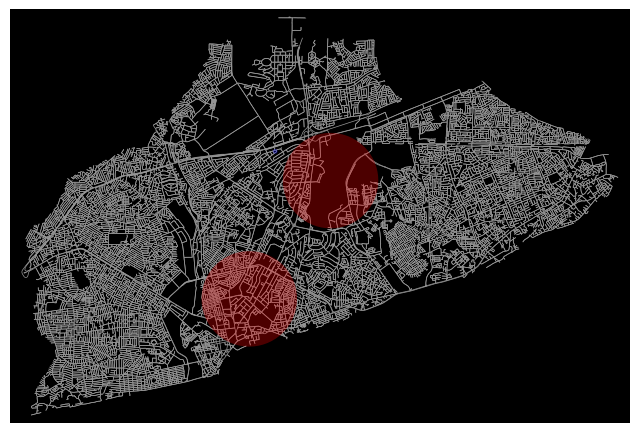

In [3]:
# Define the no-fly radius around the no-fly zones
no_fly_radius = 2000
# Define the no-fly zones and avoidance areas
no_fly_zones = [
    {"latitude": 5.6061, "longitude": -0.1681, "radius": no_fly_radius},  # Kotoka International Airport
    {"latitude": 5.561618, "longitude": -0.198676, "radius": no_fly_radius},  # Ridge Hospital
]

avoidance_zones = [
    {"latitude": 5.6171, "longitude": -0.1889, "radius": 100},  # Tallest building in Accra 50 m radius
]

# Create GeoDataFrames for no-fly zones and avoidance zones
def create_circular_zone(lat, lon, radius):
    # Create a circular polygon around the point
    return Point(lon, lat).buffer(radius / 111320)  # Convert meters to degrees (approximation)

no_fly_zones_gdf = gpd.GeoDataFrame(
    no_fly_zones, 
    geometry=[create_circular_zone(zone["latitude"], zone["longitude"], zone["radius"]) for zone in no_fly_zones]
)

avoidance_zones_gdf = gpd.GeoDataFrame(
    avoidance_zones, 
    geometry=[create_circular_zone(zone["latitude"], zone["longitude"], zone["radius"]) for zone in avoidance_zones]
)

# Plot the road network with no-fly zones and avoidance zones overlaid
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='k', edge_linewidth=0.5, show=False, close=False)

# Plot the no-fly zones
no_fly_zones_gdf.plot(ax=ax, color='red', alpha=0.3)

# Plot the avoidance zone with a big size
avoidance_zones_gdf.plot(ax=ax, color='blue', alpha=0.3)

plt.show()

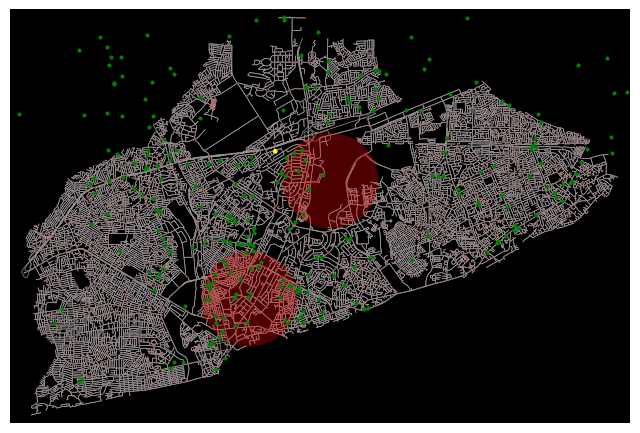

In [4]:
# Add the healthcare facilities to the map
health_facilities_df = pd.read_csv('../data/accra_facilities_filtered.csv')

# Convert the healthcare facilities DataFrame to a GeoDataFrame
health_facilities_gdf = gpd.GeoDataFrame(
    health_facilities_df, 
    geometry=gpd.points_from_xy(health_facilities_df.longitude, health_facilities_df.latitude)
)

# Plot the road network with no-fly zones, avoidance zones, and healthcare facilities overlaid
fig, ax = ox.plot_graph(G, node_size=0.1, bgcolor='k', node_color='r', edge_linewidth=0.5, show=False, close=False)

# Plot the no-fly zones as red transparent circles
no_fly_zones_gdf.plot(ax=ax, color='red', alpha=0.3)

# Plot the avoidance zones as yellow transparent circles
avoidance_zones_gdf.plot(ax=ax, color='yellow', alpha=1)

# Plot the healthcare facilities as blue points
health_facilities_gdf.plot(ax=ax, color='green', markersize=4)

# Show the final plot with all elements
plt.show()

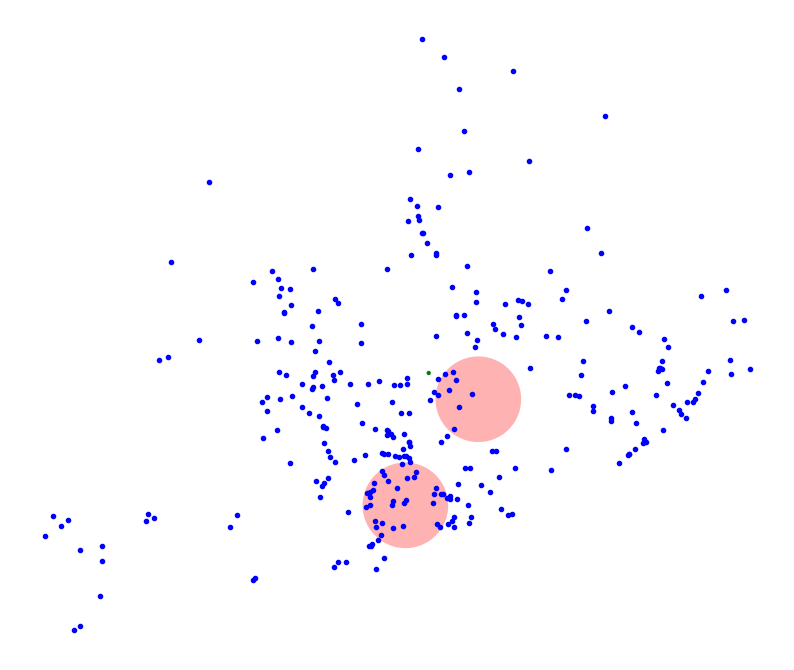

In [5]:

# Plot the simplified map with only relevant features
fig, ax = plt.subplots(figsize=(10,10))

# Plot the no-fly zones as red transparent circles
no_fly_zones_gdf.plot(ax=ax, color='red', alpha=0.3)

# Plot the avoidance zones as yellow transparent circles
avoidance_zones_gdf.plot(ax=ax, color='green', alpha=1)

# Plot the healthcare facilities as blue points
health_facilities_gdf.plot(ax=ax, color='blue', markersize=9)

# Set a background color and remove axes for better visualization
ax.set_facecolor('k')
ax.axis('off')

# Show the final plot
plt.show()

In [8]:
# Save the current figure as an image
fig.savefig('../map/simplified_map.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [9]:
# Save the no-fly zones GeoDataFrame to GeoJSON
no_fly_zones_gdf.to_file("../map/no_fly_zones.geojson", driver="GeoJSON")

# Save the avoidance zones GeoDataFrame to GeoJSON
avoidance_zones_gdf.to_file("../map/avoidance_zones.geojson", driver="GeoJSON")
